In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import approx_fprime as gradient
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import math
import csv
  

In [74]:
data_train=pd.read_csv('train_2.csv')
data_test=pd.read_csv('test_2.csv')
# data_test=pd.read_csv('test.csv')


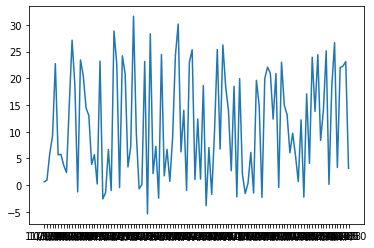

In [75]:
plt.plot(data_train['id'],data_train['value'],)

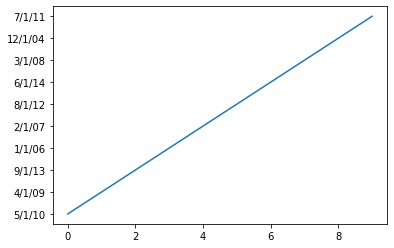

In [76]:
plt.plot(data_test['id'])

In [77]:
print(data_train['id'].head())
data_train['id'].dtype

0    11/1/04
1    10/1/12
2     1/1/07
3     2/1/06
4     6/1/07
Name: id, dtype: object


dtype('O')

In [78]:
data_train['datetime_converted'] = pd.to_datetime(data_train['id'], format="%m/%d/%y")

In [79]:
data_train['day'] = data_train['datetime_converted'].dt.day
data_train['month'] = data_train['datetime_converted'].dt.month
data_train['year'] = data_train['datetime_converted'].dt.year

data_train['year_converted'] = data_train['year']-2000

data_train['Y'] = data_train['month']


In [80]:
data_train

,id,value,datetime_converted,day,month,year,year_converted,Y
0,11/1/04,0.5992,2004-11-01,1,11,2004,4,11
1,10/1/12,0.9259,2012-10-01,1,10,2012,12,10
2,1/1/07,5.9182,2007-01-01,1,1,2007,7,1
3,2/1/06,9.2365,2006-02-01,1,2,2006,6,2
4,6/1/07,22.7446,2007-06-01,1,6,2007,7,6
...,...,...,...,...,...,...,...,...
105,9/1/06,3.2992,2006-09-01,1,9,2006,6,9
106,4/1/06,22.0183,2006-04-01,1,4,2006,6,4
107,7/1/05,22.2829,2005-07-01,1,7,2005,5,7
108,6/1/08,23.1280,2008-06-01,1,6,2008,8,6


In [81]:
final_data =data_train.drop(['id','datetime_converted','day','month','year','year_converted'],axis=1)

Text(0, 0.5, 'Output')

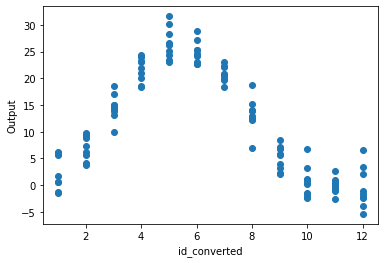

In [82]:
plt.scatter(final_data['Y'],final_data['value'])
plt.xlabel('id_converted')
plt.ylabel('Output')

In [83]:
data_test['id'].dtype
data_test['datetime_converted'] = pd.to_datetime(data_test['id'], format="%m/%d/%y")
data_test['day'] = data_test['datetime_converted'].dt.day
data_test['month'] = data_test['datetime_converted'].dt.month
data_test['year'] = data_test['datetime_converted'].dt.year
data_test['year_converted'] = data_test['year']-2000

data_test['Y'] = data_test['month']
final_data_test =data_test.drop(['id','datetime_converted','day','month','year','year_converted',],axis=1)


In [84]:
X_train=final_data['Y']
Y_train=final_data['value']
X_test=final_data_test['Y']
# Y_test=data_test['value']
# X_20.shape## As the dimension is 100, but linear regression trainning need atleast 1 dimension
# Y_20.shape
# X_20.ndim
# Y_20.ndim ## 1 ...Cant train linear regression model so we need to give dimension
x_full_train = X_train.values.reshape(-1,1)
y_full_train = Y_train.values.reshape(-1,1)
x_full_test = X_test.values.reshape(-1,1)
# y_full_train = Y_test.values.reshape(-1,1)

x_train2,x_test2,y_train2,y_test2=train_test_split(x_full_train,y_full_train,train_size=0.8)
x_train2=x_train2.reshape(-1,1)
y_train2=y_train2.reshape(-1,1)

Root Mean Square Error for M=0:10.096362824480591
Root Mean Square Error for M=1:9.238260584246653
Root Mean Square Error for M=2:5.288060795781043


<Figure size 360x360 with 0 Axes>

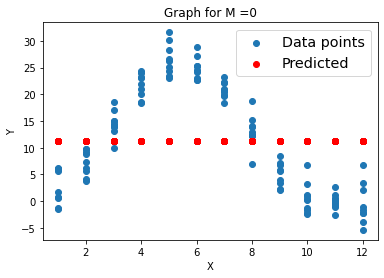

<Figure size 360x360 with 0 Axes>

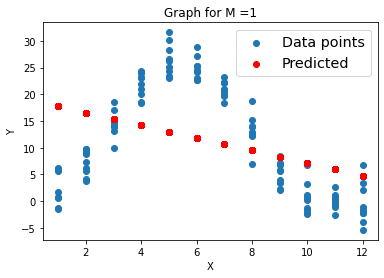

<Figure size 360x360 with 0 Axes>

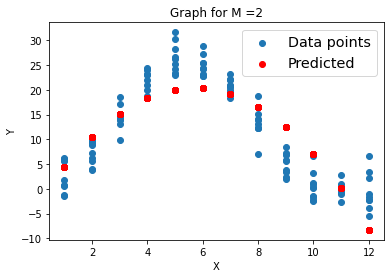

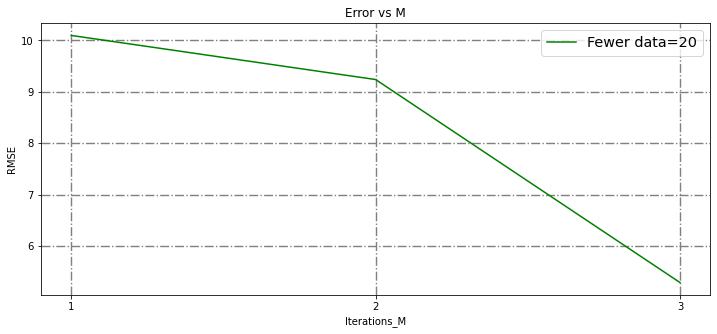

In [85]:
M=3 ## Just Change this M value to iterate for more higher polynomial
Mean_square_error=[]
design_matrix_20=[]
Coefficeint_20=[]
optimal_weights=[]
for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly = polynomial_features.fit_transform(x_full_train)
        design_matrix_20.append(X_poly)
        polynomial_reg_model_20=LinearRegression()
        polynomial_reg_model_20.fit(X_poly,y_full_train)
        Coefficeint_20.append(polynomial_reg_model_20.coef_)
        y_predicted = polynomial_reg_model_20.predict(X_poly)
        
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(x_full_train,y_full_train,label='Data points')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.scatter(x_full_train,y_predicted,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE = mean_squared_error(y_full_train, y_predicted)
        RMSE = math.sqrt(MSE)
        Mean_square_error.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
        
        #Optimisation(analystical_penrose_mooresir)
        design_matrix=X_poly
        transpose=np.transpose(design_matrix)
        dot_product=(np.dot(transpose,design_matrix))
        inverse=np.linalg.inv(dot_product)
        pseudo=np.dot(inverse,transpose)
        w_ml=np.dot(transpose,y_full_train)
        optimal_weights.append(w_ml)



Iterations_M= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

In [86]:
with open('2_Design_matrix_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_20)

with open('2_Coefficient_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_20)

In [87]:
polynomial_features_test = PolynomialFeatures(degree = 2)
X_poly_test = polynomial_features.fit_transform(x_full_test)

y_predicted_test = polynomial_reg_model_20.predict(X_poly_test)## Results without CV

In [88]:
y_predicted_test

array([[20.03105103],
       [18.29508211],
       [12.51772449],
       [ 4.412854  ],
       [10.4859836 ],
       [16.56463646],
       [20.32129973],
       [15.11339296],
       [-8.29733277],
       [19.16582821]])

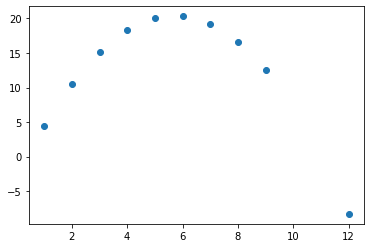

In [89]:
plt.scatter(x_full_test,y_predicted_test)

In [90]:
final_data_test

,Y
0,5
1,4
2,9
3,1
4,2
5,8
6,6
7,3
8,12
9,7


In [91]:
#convert list to DataFrame
predicted_dataframe = pd.DataFrame(y_predicted_test, columns=['points'])

In [92]:
data_test

,id,datetime_converted,day,month,year,year_converted,Y
0,5/1/10,2010-05-01,1,5,2010,10,5
1,4/1/09,2009-04-01,1,4,2009,9,4
2,9/1/13,2013-09-01,1,9,2013,13,9
3,1/1/06,2006-01-01,1,1,2006,6,1
4,2/1/07,2007-02-01,1,2,2007,7,2
5,8/1/12,2012-08-01,1,8,2012,12,8
6,6/1/14,2014-06-01,1,6,2014,14,6
7,3/1/08,2008-03-01,1,3,2008,8,3
8,12/1/04,2004-12-01,1,12,2004,4,12
9,7/1/11,2011-07-01,1,7,2011,11,7


In [93]:
# Add a Column to a DataFrame From Another DataFrame Pandas
data_test ['Prediction']= predicted_dataframe['points']



In [94]:
results=data_test.drop(['datetime_converted','day','month','year','year_converted','Y'],axis=1)

In [95]:
results

,id,Prediction
0,5/1/10,20.031051
1,4/1/09,18.295082
2,9/1/13,12.517724
3,1/1/06,4.412854
4,2/1/07,10.485984
5,8/1/12,16.564636
6,6/1/14,20.321300
7,3/1/08,15.113393
8,12/1/04,-8.297333
9,7/1/11,19.165828


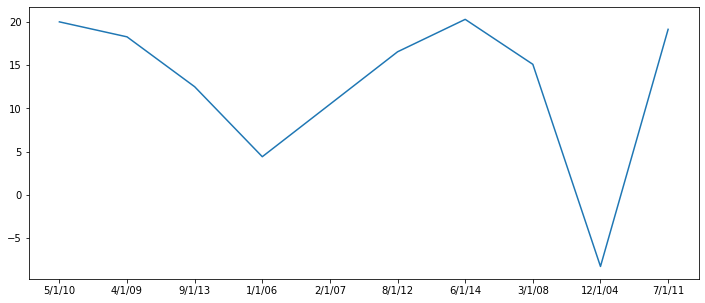

In [96]:
plt.figure(figsize=(12,5))
plt.plot(results['id'],results['Prediction'])


In [97]:
results.to_csv('predictions_problem2.csv',index=False) 

In [98]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=1):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [99]:
estimator = PolynomialRegression()
degrees = np.arange(1, 20)
cv_model = GridSearchCV(estimator, # the model we wish to optimize
                        cv=10, # k-folds
                        param_grid={'deg': degrees}, # the parameter grid
                        scoring='neg_mean_squared_error')
cv_model.fit(X_train,Y_train) ## Give dataframe columns as input



GridSearchCV(cv=10, estimator=PolynomialRegression(),
             param_grid={'deg': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='neg_mean_squared_error')

In [100]:
print(f"Optimal Polynomial Degree: {cv_model.best_params_}")
print(f"Coefficients: {cv_model.best_estimator_.coef_}")

Optimal Polynomial Degree: {'deg': 6}
Coefficients: [-8.26573505e-04  2.70928709e-02 -2.89954858e-01  9.45745201e-01
  7.83805091e-01 -8.79547673e-01  2.07623188e+00]


In [101]:
cross_validation_prediction=cv_model.predict(final_data_test['Y'])

In [102]:
cross_validation_prediction

array([26.01999547, 21.75562669,  5.23483005,  2.66254594,  7.19311195,
       12.86773144, 25.62494779, 14.52160718, -0.42863436, 20.63917349])

In [103]:
predicted_dataframe_cv = pd.DataFrame(cross_validation_prediction, columns=['points'])
data_test ['Prediction_CV']= predicted_dataframe_cv['points']

In [104]:
results_CV=data_test
 

In [105]:
results_CV

,id,datetime_converted,day,month,year,year_converted,Y,Prediction,Prediction_CV
0,5/1/10,2010-05-01,1,5,2010,10,5,20.031051,26.019995
1,4/1/09,2009-04-01,1,4,2009,9,4,18.295082,21.755627
2,9/1/13,2013-09-01,1,9,2013,13,9,12.517724,5.234830
3,1/1/06,2006-01-01,1,1,2006,6,1,4.412854,2.662546
4,2/1/07,2007-02-01,1,2,2007,7,2,10.485984,7.193112
5,8/1/12,2012-08-01,1,8,2012,12,8,16.564636,12.867731
6,6/1/14,2014-06-01,1,6,2014,14,6,20.321300,25.624948
7,3/1/08,2008-03-01,1,3,2008,8,3,15.113393,14.521607
8,12/1/04,2004-12-01,1,12,2004,4,12,-8.297333,-0.428634
9,7/1/11,2011-07-01,1,7,2011,11,7,19.165828,20.639173


In [106]:
results_CV=data_test.drop(['datetime_converted','day','month','year','year_converted','Y','Prediction'],axis=1)
Combined=data_test.drop(['datetime_converted','day','month','year','year_converted','Y'],axis=1)

In [107]:
Combined.to_csv('Linear_reg and CV predicted.csv',index=False) 
results_CV.to_csv('predictions_problem2_CV.csv',index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

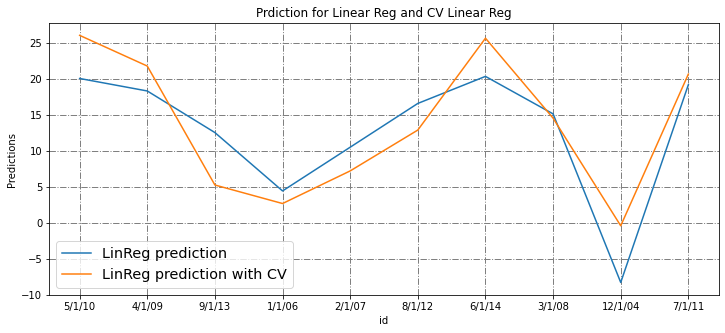

In [108]:

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(Combined['id'],Combined['Prediction'],label='LinReg prediction')
plt.plot(Combined['id'],Combined['Prediction_CV'],label='LinReg prediction with CV')
plt.title("Prdiction for Linear Reg and CV Linear Reg")
plt.xlabel('id')
plt.ylabel('Predictions')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show